In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats
import math

In [2]:
FRAMES = 37

In [3]:
def p_uni(i: int, tau: int, I: int):
    '''
    PDF for sampling f_j given reference frame f_i.
    '''

    x = np.arange(I)
    m = ((x != i) & (x <= i + tau) & (x >= i - tau)).astype(int)
    p = 1 / (min(tau, i) + min(tau, I - i - 1))

    return m * p

In [4]:
def p_nml(i: int, sigma: float, I):
    '''
    PDF for sampling f' given reference frame f.
    '''
    x = np.arange(I)
    pdf = stats.norm.pdf(x, i, sigma)
    pdf[i] = 0.0
    p = pdf / pdf.sum()

    return p

In [10]:
pdf_15 = p_nml(9, 5.0, I=FRAMES)

1.0000000000000002


<BarContainer object of 37 artists>

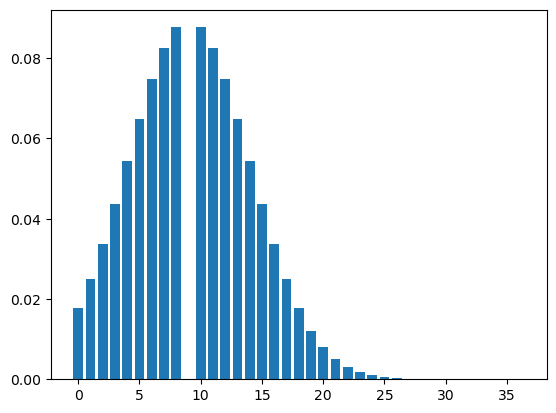

In [11]:
print(np.array(pdf_15).sum())
plt.bar(np.arange(FRAMES), pdf_15)

In [9]:
np.random.choice(np.arange(len(pdf_15)), p=pdf_15)

4

In [21]:
ps = np.array([p_uni(i, 5.0, I=FRAMES) for i in range(FRAMES)])

In [22]:
ps = np.array([p_nml(i, 5.0, I=FRAMES) for i in range(200)])